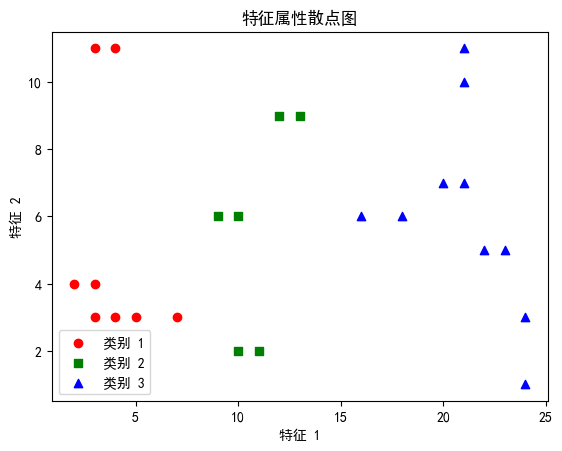

In [25]:
import numpy as np
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 配置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为SimHei或其他合适的字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

X, Y = [], []  # 读取数据
fr = open("数据文件\\knn2.txt")
for line in fr.readlines():
    line = line.strip().split()
    X.append([int(line[0]), int(line[1])])
    Y.append(int(line[-1]))
X = np.array(X)  # 转换成numpy数组,X是特征属性集
Y = np.array(Y)  # y是类别标签集

# 绘制散点图
plt.figure()
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='o', label='类别 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], c='g', marker='s', label='类别 2')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], c='b', marker='^', label='类别 3')
plt.xlabel("特征 1")
plt.ylabel("特征 2")
plt.title("特征属性散点图")
plt.legend(loc='best')
plt.show()

In [26]:
# 归一化 (如果需要的话)
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

# 划分训练集和测试集，测试集比例16%
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.16)

# 训练贝叶斯分类模型
model = GaussianNB()
model.fit(train_X, train_y)

# 输出模型的参数
print(model)

GaussianNB()


In [27]:
# 预测测试集的类别
predicted = model.predict(test_X)

# 输出分类信息
classification_rep = metrics.classification_report(test_y, predicted)

print(classification_rep)

              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



混淆矩阵:
[[0 0 0]
 [0 1 0]
 [0 0 3]]


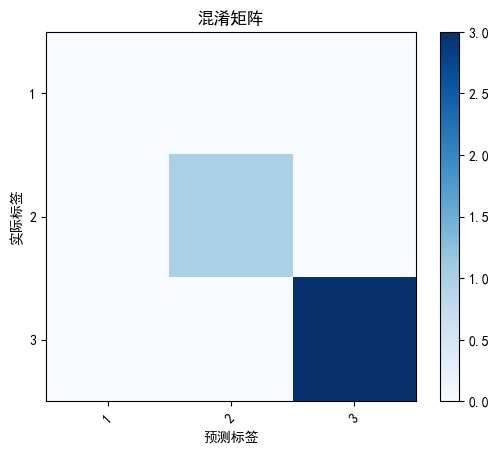

In [28]:
# 输出混淆矩阵
label = list(set(Y))  # 去重复，得到标签类别
confusion_matrix = metrics.confusion_matrix(test_y, predicted, labels=label)
print("混淆矩阵:")
print(confusion_matrix)

# 可视化混淆矩阵
plt.figure()
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("混淆矩阵")
plt.colorbar()
tick_marks = np.arange(len(set(Y)))
plt.xticks(tick_marks, [str(i) for i in set(Y)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in set(Y)])
plt.ylabel("实际标签")
plt.xlabel("预测标签")
# 显示颜色标尺
plt.show()

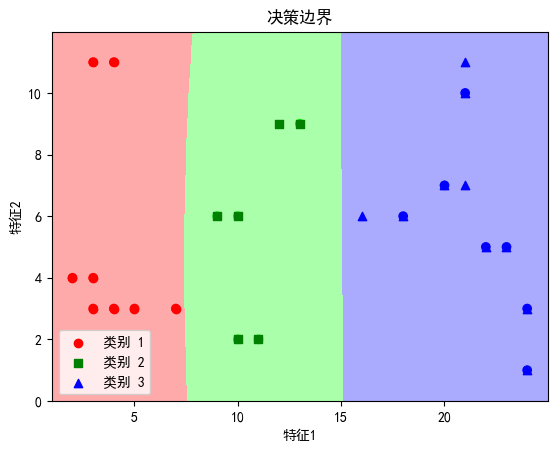

In [29]:
# 可视化决策边界
h = .02  # 网格中的步长
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# 用模型进行预测
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 绘制决策边界
plt.figure()
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# 绘制训练数据点
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel("特征1")
plt.ylabel("特征2")
plt.title("决策边界")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='o', label='类别 1')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], c='g', marker='s', label='类别 2')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], c='b', marker='^', label='类别 3')
plt.legend(loc='best')
plt.show()

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


alpha=0.05: 平均准确率=1.00, 标准差=0.00
alpha=0.1: 平均准确率=1.00, 标准差=0.00
alpha=1.0: 平均准确率=0.87, 标准差=0.17
alpha=10.0: 平均准确率=0.55, 标准差=0.13


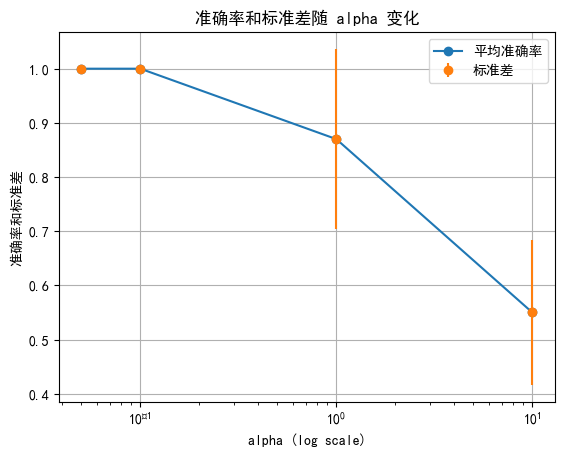

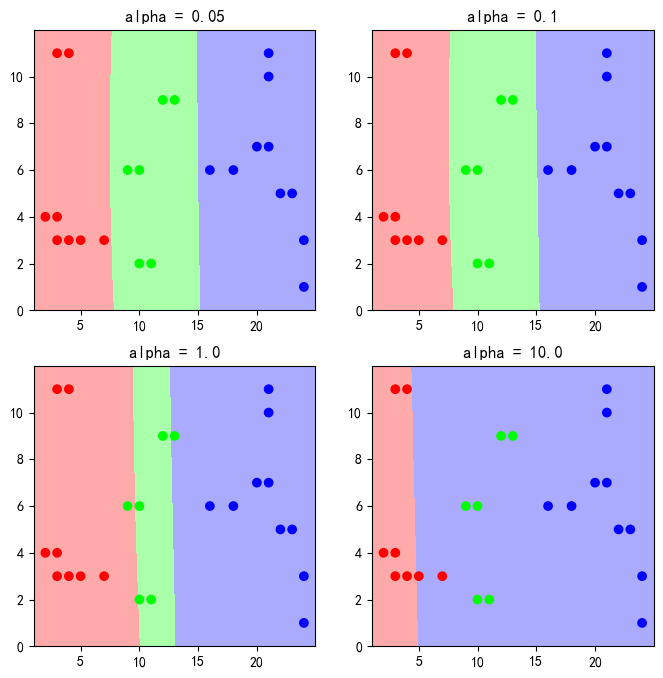

In [38]:
from sklearn.model_selection import cross_val_score

alpha_values = [0.05, 0.1, 1.0, 10.0]  # 不同的 alpha 参数值

# 存储平均准确率和标准差的列表
mean_accuracies = []
std_accuracies = []

for alpha in alpha_values:
    model = GaussianNB(var_smoothing=alpha)  # 使用不同的 alpha 参数
    scores = cross_val_score(model, X, Y, cv=5)  # 5折交叉验证
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)
    print(f"alpha={alpha}: 平均准确率={scores.mean():.2f}, 标准差={scores.std():.2f}")

# 可视化平均准确率和标准差
plt.figure()
plt.semilogx(alpha_values, mean_accuracies, marker='o', label='平均准确率')
plt.errorbar(alpha_values, mean_accuracies, yerr=std_accuracies, fmt='o', label='标准差')
plt.title("准确率和标准差随 alpha 变化")
plt.xlabel("alpha (log scale)")
plt.ylabel("准确率和标准差")
plt.legend()
plt.grid(True)
plt.show()

# 创建一个子图以绘制不同 alpha 值下的决策边界
plt.figure(figsize=(8, 8))
for i, alpha in enumerate(alpha_values):
    plt.subplot(2, 2, i + 1)
    model_ = GaussianNB(var_smoothing=alpha)  # 使用不同的 alpha 参数
    model_.fit(X, Y)
    Z = model_.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(f'alpha = {alpha}')
    # plt.xlabel("特征 1")
    # plt.ylabel("特征 2")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.show()